In [57]:
# Import the libraries 

import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from glob import glob

import numpy as np

In [58]:
## Here, we are using the Tranfer learning Technique. So, input size should be according to that. 

IMAGE_SIZE = [224, 224]

train_data_path = '/content/drive/MyDrive/cotton_disease_data/data/train'
valid_data_path = '/content/drive/MyDrive/cotton_disease_data/data/test'

In [59]:
# Import the InceptionV3 library and add preprocessing layer to the front of InceptionV3

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [60]:
## Now, InceptionV3 model has been loaded. So, we dont need to train the existing weights. 

for layer in inception.layers:
    layer.trainable = False

In [61]:
## Now lets find out how many calsses we have in our data

num_folders = glob('/content/drive/MyDrive/cotton_disease_data/data/train/*')
num_folders

['/content/drive/MyDrive/cotton_disease_data/data/train/diseased cotton leaf',
 '/content/drive/MyDrive/cotton_disease_data/data/train/fresh cotton leaf',
 '/content/drive/MyDrive/cotton_disease_data/data/train/fresh cotton plant',
 '/content/drive/MyDrive/cotton_disease_data/data/train/diseased cotton plant']

In [62]:
## Now we have to flatten the output from inceptionv3 layers. 
x = Flatten()(inception.output)
x

<KerasTensor: shape=(None, 51200) dtype=float32 (created by layer 'flatten_4')>

In [63]:
## Now lets add the last layer according to our dataset.
## We have more than 2 categories, so we will use SoftMax as activation function

prediction = Dense(len(num_folders), activation='softmax')(x)

# Now we have made all the nacessary changes according to our dataset. So, lets fit the model

model = Model(inputs = inception.input, outputs = prediction)




In [64]:
## Lest see how our model looks like
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_376 (Conv2D)            (None, 111, 111, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_376 (Batch  (None, 111, 111, 32  96         ['conv2d_376[0][0]']             
 Normalization)                 )                                                           

In [65]:
## Add cost function and optimizer to our model

model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

In [66]:
## Genrating more number of images using ImageDataGenrator
## We will use shearing, zooming and other image genration

train_datagen = ImageDataGenerator(rescale= 1./255, shear_range= 0.2, zoom_range= 0.2, horizontal_flip= True)

# for test data we will only rescale the dataset
test_datagen = ImageDataGenerator(rescale= 1./255)

In [67]:
## Now, Taking data from directories

training_data = train_datagen.flow_from_directory('/content/drive/MyDrive/cotton_disease_data/data/train', target_size= (224, 224), batch_size= 32, class_mode= 'categorical')

Found 1951 images belonging to 4 classes.


In [68]:
## Similarly for test data
test_data = test_datagen.flow_from_directory('/content/drive/MyDrive/cotton_disease_data/data/test', target_size=(224, 224), batch_size=32, class_mode='categorical')

Found 17 images belonging to 4 classes.


In [69]:
our_model = model.fit(training_data, validation_data= test_data, epochs= 20, steps_per_epoch= len(training_data), validation_steps= len(test_data))

Epoch 1/20
61/61 [==============================] - 52s 762ms/step - loss: 1.8106 - accuracy: 0.7658 - val_loss: 1.3873 - val_accuracy: 0.8235
Epoch 2/20
61/61 [==============================] - 42s 684ms/step - loss: 0.5934 - accuracy: 0.8949 - val_loss: 0.6063 - val_accuracy: 0.8824
Epoch 3/20
61/61 [==============================] - 41s 673ms/step - loss: 0.6350 - accuracy: 0.8970 - val_loss: 0.0383 - val_accuracy: 1.0000
Epoch 4/20
61/61 [==============================] - 41s 669ms/step - loss: 0.7484 - accuracy: 0.9026 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 5/20
61/61 [==============================] - 41s 669ms/step - loss: 0.5379 - accuracy: 0.9252 - val_loss: 0.3744 - val_accuracy: 0.9412
Epoch 6/20
61/61 [==============================] - 41s 667ms/step - loss: 0.5445 - accuracy: 0.9308 - val_loss: 9.1456e-05 - val_accuracy: 1.0000
Epoch 7/20
61/61 [==============================] - 41s 674ms/step - loss: 0.4539 - accuracy: 0.9359 - val_loss: 0.0209 - val_accuracy: 1.

In [70]:
## Clearly we can see, our model accuracy and validation accuracy both are almost same.

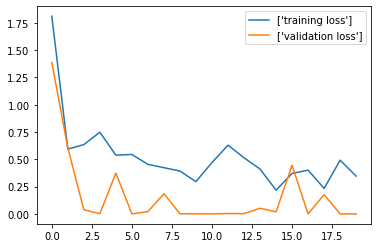

In [71]:
## Now lets visulize the training and validation loss
import matplotlib.pyplot as plt

plt.plot(our_model.history['loss'], label = ['training loss'])
plt.plot(our_model.history['val_loss'], label = ['validation loss'])
plt.legend()
plt.show()


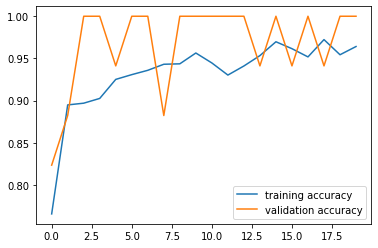

In [72]:
### Plot the accuracy

plt.plot(our_model.history['accuracy'], label='training accuracy')
plt.plot(our_model.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()


In [74]:
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/cotton_disease_data/model_inception.h5')

In [79]:
y_pred = model.predict(test_data)

In [81]:
## We will take max value of each predicted values
import numpy as np
y_pred = np.argmax(y_pred, axis=1)


In [82]:
y_pred

array([3, 3, 0, 3, 2, 0, 1, 2, 1, 0, 1, 3, 1, 3, 2, 1, 2])